Primero, tenemos las variables:
$$\rho_a: \text{Densidad del aire}$$
$$\rho_d: \text{Densidad de la gota}$$
$$F_d: \text{Friccion con el aire}$$
$$E: \text{Empuje} $$
$$\eta: \text{Viscosidad dinamica del aire}$$
Luego, la ecuacion de movimiento sera

$$m\frac{dv}{dt}= E + F_d - mg = \frac{4\pi}{3} r_d^3 \rho_a g + 6\pi \eta r_d v - \frac{4\pi}{3} r_d^3 \rho_d g $$

Podemos colocar la ecuacion para usar odeint:

$$ \frac{dv}{dt}= \frac{\rho_a}{\rho_d} g + \frac{9 \eta}{2  r_d^2 \rho_d}  v - g $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

pi=np.pi

ro_a= 1.225 # kg/m3
ro_d= 1.5 # kg/m3
eta= 1.849*0.00001 # kg/m.s
r_d= 0.000006 # m
g= 9.81 # m/s2

alpha= 0.3

In [21]:
def F(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g) + ((9 *eta / (2 * (r_d*r_d) * ro_d)) * y[1])
    return dy

In [22]:
t_inicial= 0
t_max= 1
dt= 0.1
t= np.arange(t_inicial, t_max+dt, dt)

In [33]:
y0=[0.0, -0.1]

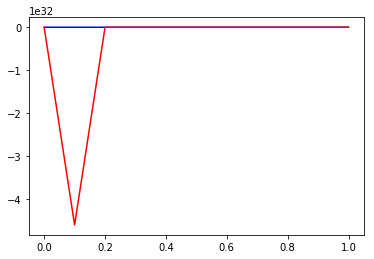

In [34]:
plt.figure()
y= odeint(F, y0, t)
plt.plot(t,y[:,0],'b')
plt.plot(t,y[:,1],'r')
plt.show()

Ahora resolveremos considerando parte de la gota se evapora:

$$ \frac{d^2 z}{dt^2}= \left( \frac{\rho_a}{\rho_d} - 1 \right) g + \frac{9 \eta}{2  r_d^2(t) \rho_d}  v $$

con

$$r_d = r_0 e^{-\alpha t} $$

In [35]:
def G(y,t):
    
    dy=[0,0]
    dy[0]= y[1] 
    dy[1]= (((ro_a /ro_d) - 1) * g ) + (9 *eta / (2 * ( r_d*np.exp(-2*t*alpha) * ro_d))) * y[1] 
    return dy

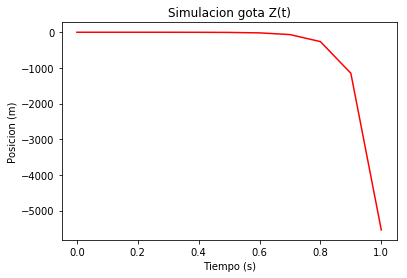

In [36]:
plt.figure()
y2= odeint(G, y0, t)
plt.plot(t,y2[:,0],'r')
ax=plt.gca()
ax.set_title('Simulacion gota Z(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Posicion (m)')
#plt.xlim(0, 2)
#plt.ylim(-10, 0)
plt.axis()
plt.show()

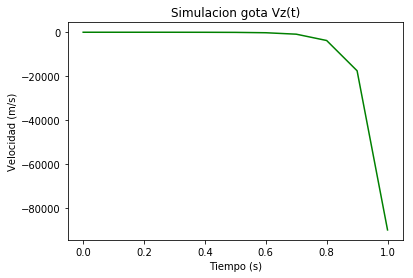

In [37]:
plt.plot(t,y2[:,1],'g')
ax=plt.gca()
ax.set_title('Simulacion gota Vz(t)')
ax.set_xlabel('Tiempo (s)')
ax.set_ylabel('Velocidad (m/s)')
#plt.xlim(0, 0.8)
#plt.ylim(-10, 0)
plt.axis()
plt.show()